First 5 records:
       TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


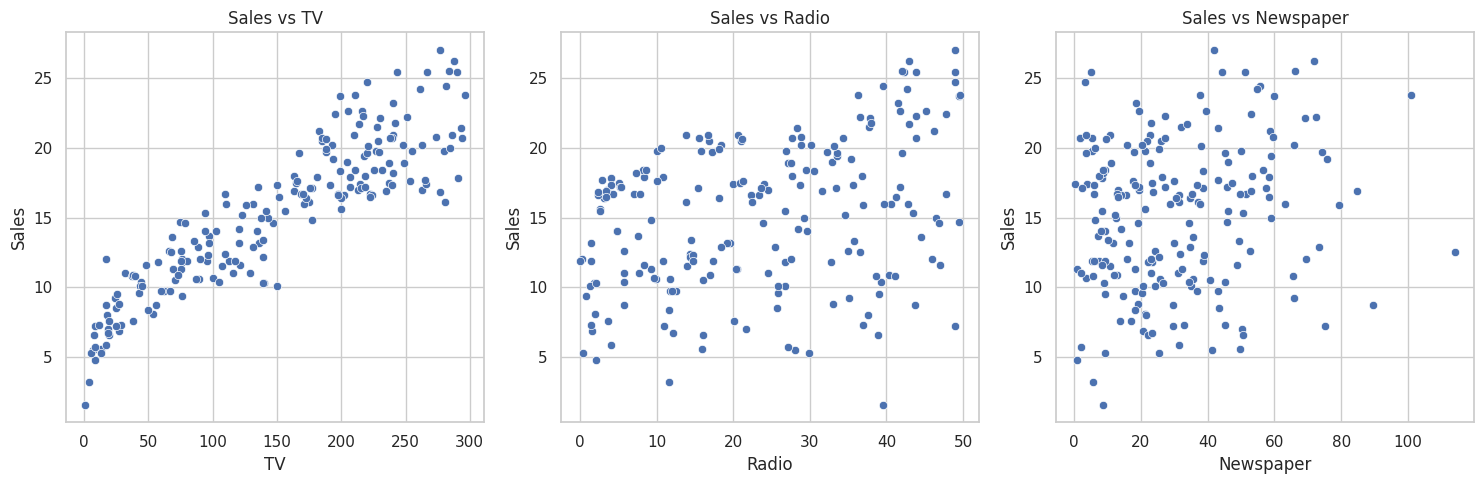


Model Evaluation:
Mean Squared Error: 2.91
R^2 Score: 0.91

Model Coefficients:
TV: 0.0545
Radio: 0.1009
Newspaper: 0.0043
Intercept: 4.7141


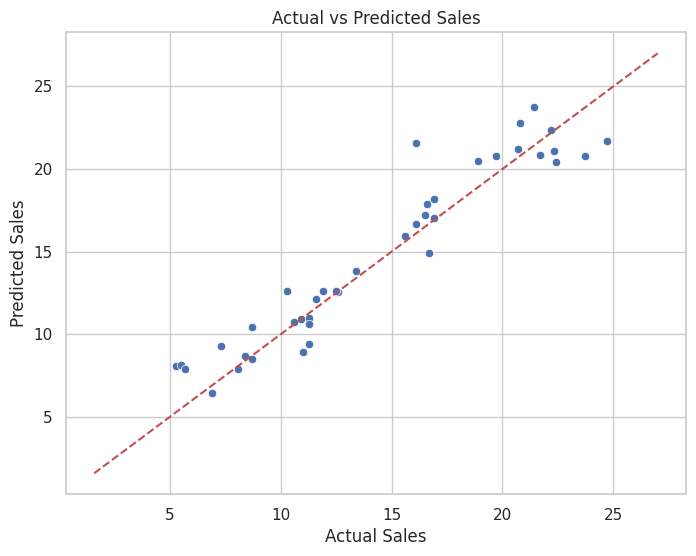

In [5]:
# Sales Prediction using Linear Regression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("advertising.csv")  # Make sure advertising.csv is in the same folder

# Basic information
print("First 5 records:\n", df.head())
print("\nDataset Info:")
print(df.info())

# Visualization: Sales vs Advertising Channels
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
for i, column in enumerate(['TV', 'Radio', 'Newspaper']):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=df, x=column, y='Sales')
    plt.title(f'Sales vs {column}')
plt.tight_layout()
plt.show()

# Prepare data
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Visualization: Actual vs Predicted Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()
